In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import set_style
set_style('whitegrid')

In [2]:
gross_data = pd.read_csv('https://raw.githubusercontent.com/tacookson/data/master/broadway-grosses/grosses.csv',parse_dates = ['week_ending'])

In [3]:
show_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/show_info_1985-2019.csv')

In [4]:
gross_data


,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews
0,1985-06-09,1,3915937.00,42nd Street,St. James Theatre,282368.00,NaN,30.42,NaN,9281,1655,0.7010,8,0
1,1985-06-09,1,3915937.00,A Chorus Line,Sam S. Shubert Theatre,222584.00,NaN,27.25,NaN,8167,1472,0.6935,8,0
2,1985-06-09,1,3915937.00,Aren't We All?,Brooks Atkinson Theatre,249272.00,NaN,33.75,NaN,7386,1088,0.8486,8,0
3,1985-06-09,1,3915937.00,Arms and the Man,Circle in the Square Theatre,95688.00,NaN,20.87,NaN,4586,682,0.8405,8,0
4,1985-06-09,1,3915937.00,As Is,Lyceum Theatre,61059.00,NaN,20.78,NaN,2938,684,0.5369,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,26109896.25,The Phantom of the Opera,Majestic Theatre,639215.93,1358986.0,72.18,213.0,8856,1605,0.6897,8,0
47520,2020-03-01,40,26109896.25,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,1566688.0,132.02,297.0,10004,1478,0.8461,8,0
47521,2020-03-01,40,26109896.25,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,1549625.0,115.41,423.0,9811,1435,0.9767,7,0
47522,2020-03-01,40,26109896.25,West Side Story,Broadway Theatre,1598947.32,1722464.0,114.87,373.0,13920,1740,1.0000,8,0


In [5]:
#0) Remove shows that lasted for just 1 week?  only 20 such entries or shows with fewer than 2 performances? TBD
#0.5) Correct Gross values based on dollar data. Use CPI data for this. THIS IS DONE
#1) Seasonal plot for total gross, Total Seats available, Average percentage capacity across week.
#2) Trends for total gross (use average across months), (Average percentage capacity across month.)
#3) Correlation between gross and stock market data. 
#4) group data based on Show type, Theatre size, Number of weeks it ran,  and repeat steps 1,2. 



In [6]:
#0) How do we handle fewer than 2 weeks or have fewer than 4 performances. Also, How do we handle revivals? 
# Also, Some shows restart as revivals. How do we handle such shows? To BE DONE

In [7]:
#0.5)  Use consumer price index to normalize dollar values. Used this data source https://fred.stlouisfed.org/series/CPIAUCSL 
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])
CPI_data.rename(columns = {'CWSR0000SA0':'CPI'}, inplace = True)
gross_data['year'] = gross_data['week_ending'].dt.year
gross_data['month'] = gross_data['week_ending'].dt.month
CPI_data['year'] = CPI_data['DATE'].dt.year
CPI_data['month']= CPI_data['DATE'].dt.month

In [8]:
## All values in  2022-04-01 dollar value
CPI_data['CPI'] = CPI_data.iloc[-1]['CPI']/CPI_data['CPI']

In [9]:
CPI_data2 = CPI_data[['CPI','month','year']]
gross_data2 = gross_data.merge(CPI_data2, how = 'left', on = ['month', 'year'])
gross_data['weekly_gross_overall'] = gross_data2['weekly_gross_overall']*gross_data2['CPI']
gross_data['weekly_gross'] = gross_data2['weekly_gross']*gross_data2['CPI']
gross_data['avg_ticket_price'] = gross_data2['avg_ticket_price']*gross_data2['CPI']
gross_data['potential_gross'] = gross_data2['potential_gross']*gross_data2['CPI']
gross_data['top_ticket_price']= gross_data2['top_ticket_price']*gross_data2['CPI']

In [ ]:
#1) Seasonal plot for total gross, Total Seats available, Average percentage capacity across week.

/Users/gautam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross')

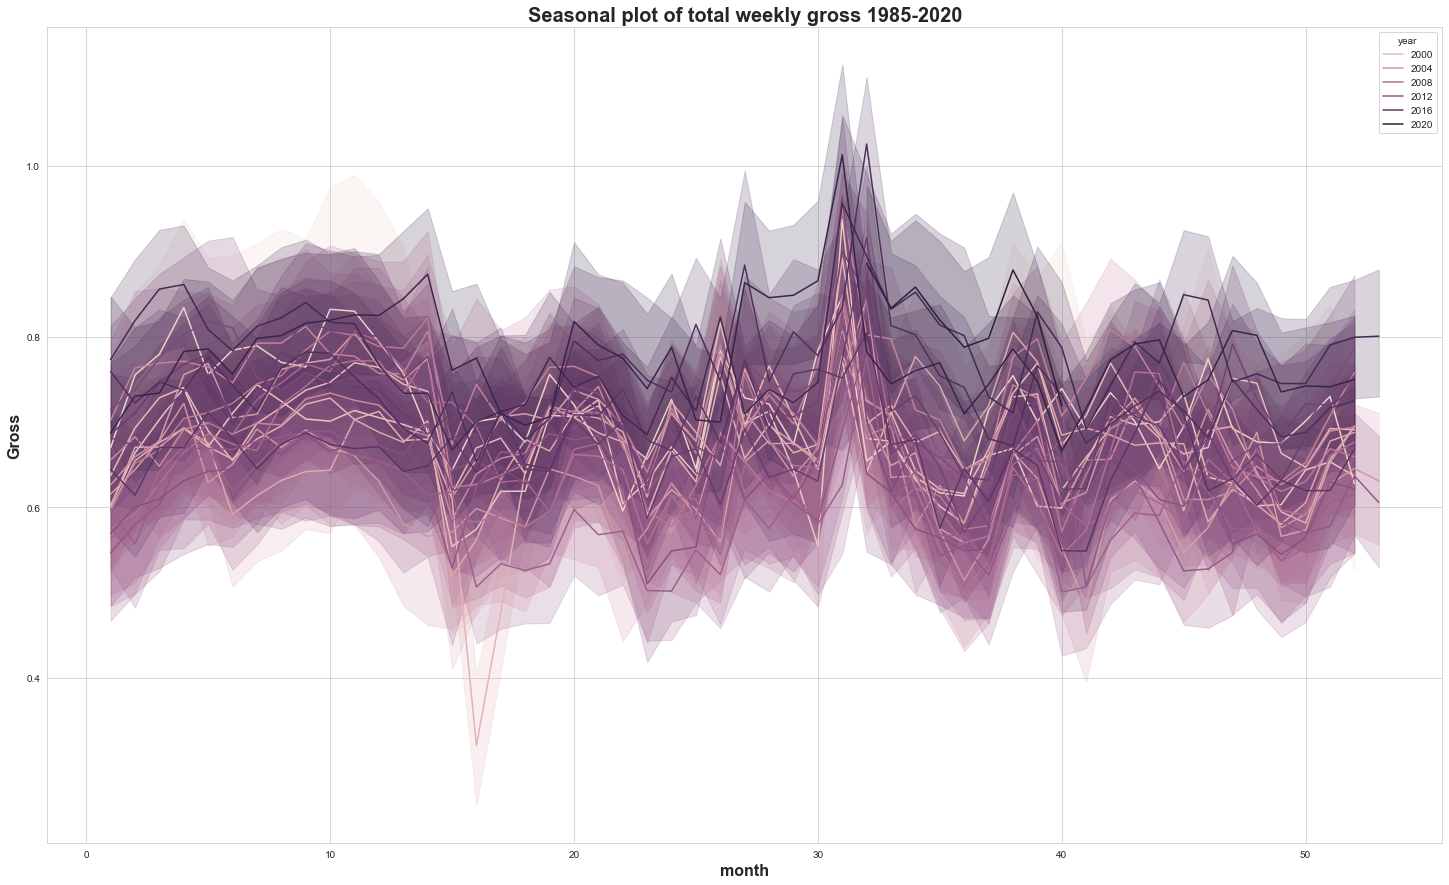

In [13]:
#Seasonal plot of weekly total gross from 1985 to 2020. Shows a clear bump in week 30 of the season corresponding
#december
gross_data = gross_data[gross_data['year'] > 1997]
gross_data['gross_ratio'] = gross_data['weekly_gross']/gross_data['potential_gross']
variable = 'gross_ratio'
fig, ax = plt.subplots(figsize=(25,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(gross_data['week_number'], gross_data[variable], hue=gross_data['year'])
ax.set_title('Seasonal plot of total weekly gross 1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))

/Users/gautam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross')

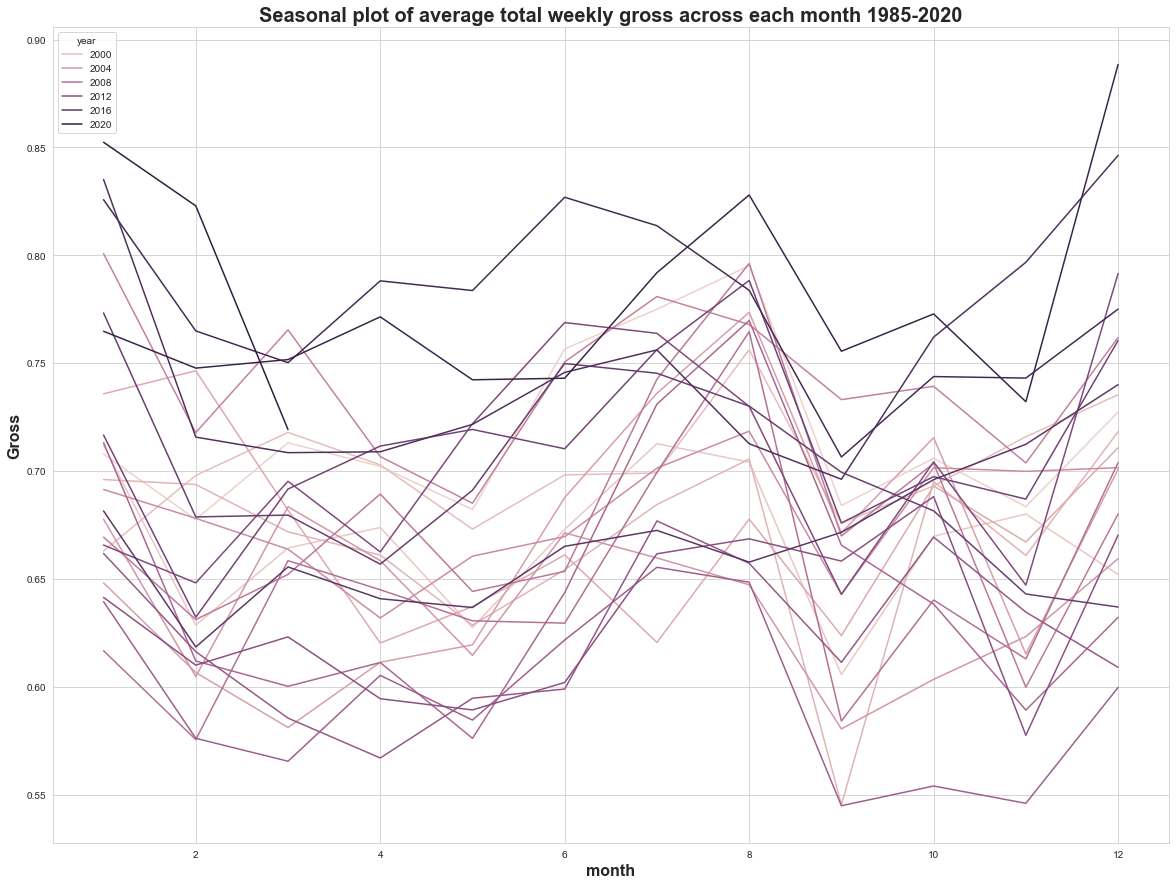

In [14]:
#Seasonal plot of monthly average of weekly gross from 1985 to 2020
#Compute monthly average:
df = gross_data[['gross_ratio','year','month','week_number']]
df2 = df.groupby(['year','month']).mean().reset_index()
fig, ax = plt.subplots(figsize=(20,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(df2['month'], df2['gross_ratio'], hue=df2['year'])
ax.set_title('Seasonal plot of average total weekly gross across each month 1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))

In [ ]:
#Seasonal  plot of  total seats sold each week
df = gross_data[['seats_sold','year','month', 'week_number']]
df2 = df.groupby(['week_number','year','month']).sum().reset_index()
fig, ax = plt.subplots(figsize=(20,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(df2['week_number'], df2['seats_sold'], hue=df2['year'])
ax.set_title('Seasonal total seats sold each week', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Seats Sold', fontsize = 16, fontdict=dict(weight='bold'))

In [ ]:
#Seasonal  plot of monthly average of total seats sold
df = gross_data[['seats_sold','year','month', 'week_number']]
df2 = df.groupby(['week_number','year','month']).sum().reset_index()
df3 = df2.groupby(['month','year']).mean().reset_index()
fig, ax = plt.subplots(figsize=(20,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(df3['month'], df3['seats_sold'], hue=df3['year'])
ax.set_title('Seasonal  average of weekly seats sold across each month', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Seats Sold', fontsize = 16, fontdict=dict(weight='bold'))

In [ ]:
#Seasonal  plot of average weekly percentage capacity
df = gross_data[['pct_capacity','year','month', 'week_number']]
df2 = df.groupby(['week_number','year','month']).mean().reset_index()
fig, ax = plt.subplots(figsize=(20,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(df2['week_number'], df2['pct_capacity'], hue=df2['year'])
ax.set_title('Seasonal plot weekly percentage capacity 1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('pct_capacity', fontsize = 16, fontdict=dict(weight='bold'))

In [ ]:
#SEasonal plot of average monthly percentage capacity
df = gross_data[['pct_capacity','year','month']]
df2 = df.groupby(['year','month']).mean().reset_index()
fig, ax = plt.subplots(figsize=(20,15))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.lineplot(df2['month'], df2['pct_capacity'], hue=df2['year'])
ax.set_title('Seasonal plot monthly percentage capacity 1985-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('pct_capacity', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Gross Ratio')

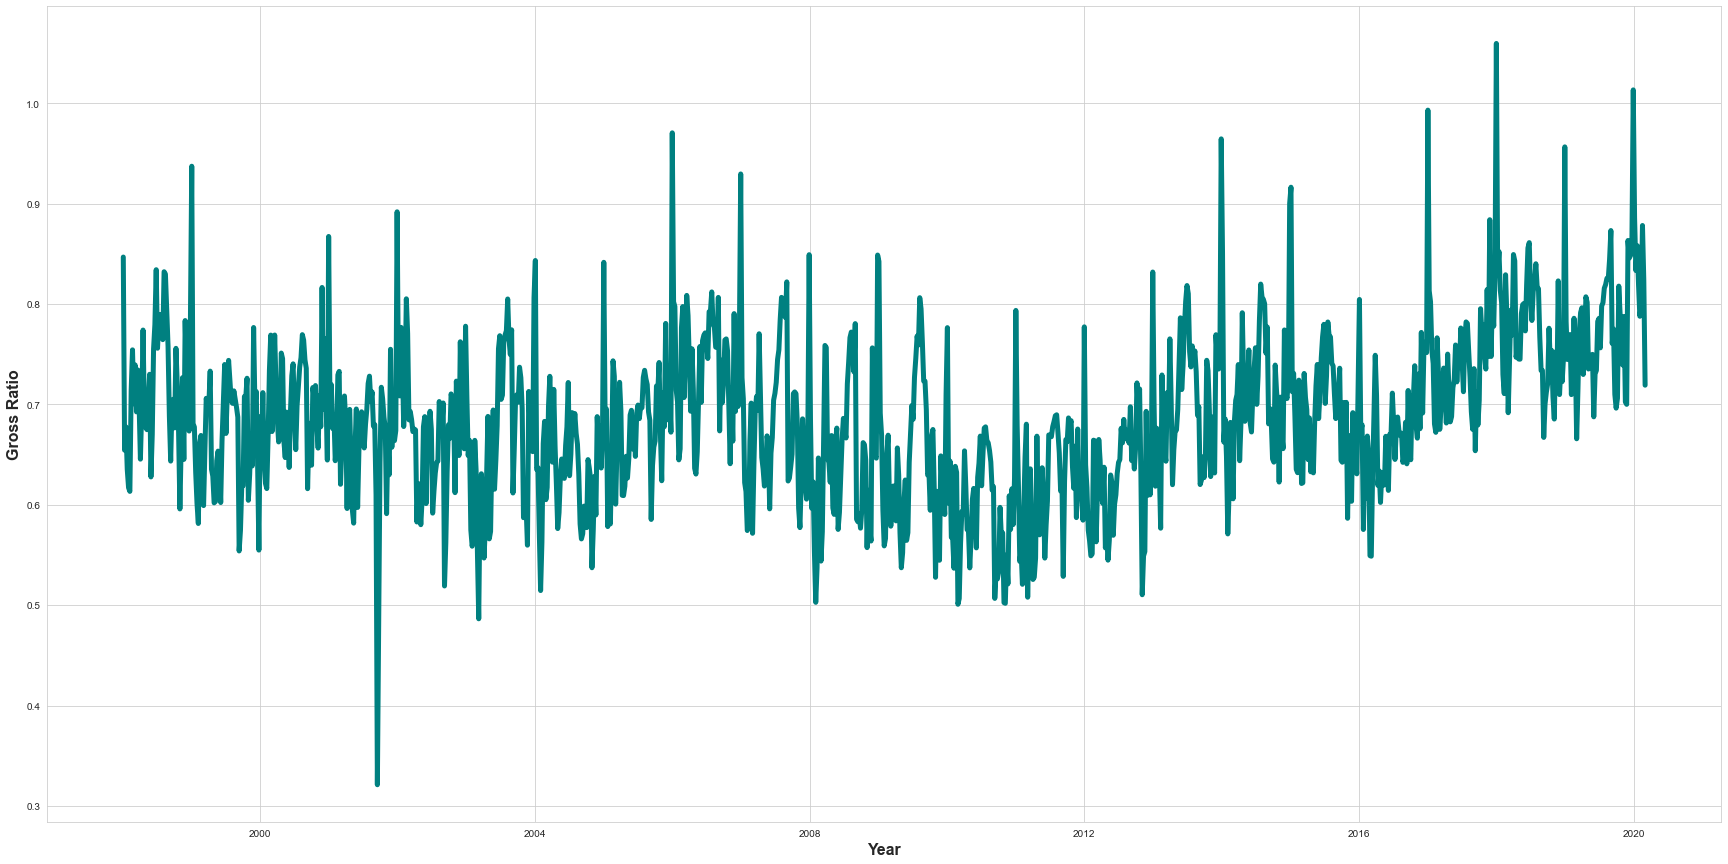

In [15]:
#Trend Plots
ig, ax = plt.subplots(figsize=(30,15))
df = gross_data[['gross_ratio','week_ending']]
df2 = df.groupby(['week_ending']).mean().reset_index()
sns.lineplot(x=df2['week_ending'],y=df2['gross_ratio'],color="teal",linewidth="5")
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross Ratio', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Average weekly gross')

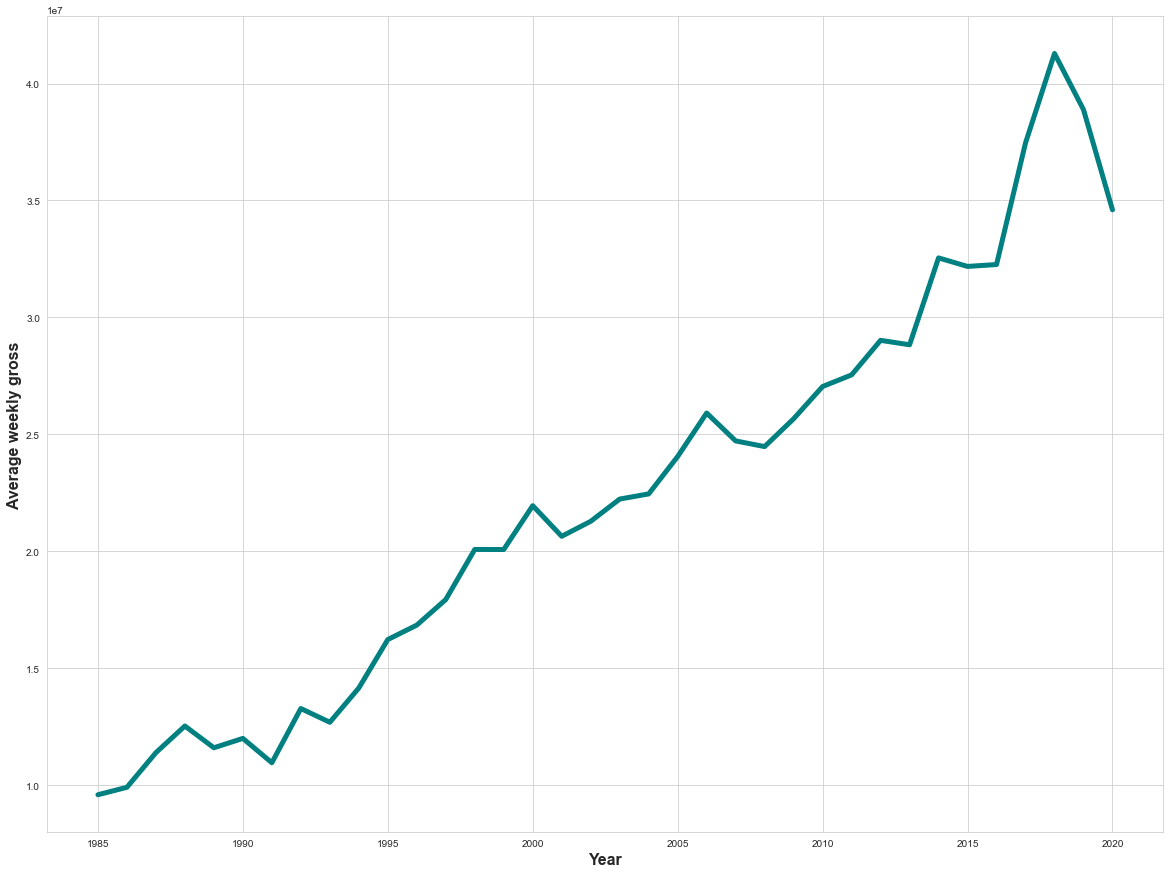

In [10]:
#group by month and plot from 1985 to 2022
fig, ax = plt.subplots(figsize=(20,15))
df = gross_data[['weekly_gross_overall','year','month','week_number']]
df2 = df.groupby(['year']).mean().reset_index()
sns.lineplot(x=df2['year'],y=df2['weekly_gross_overall'],color="teal",linewidth="5")
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Average weekly gross', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Total yearly gross')

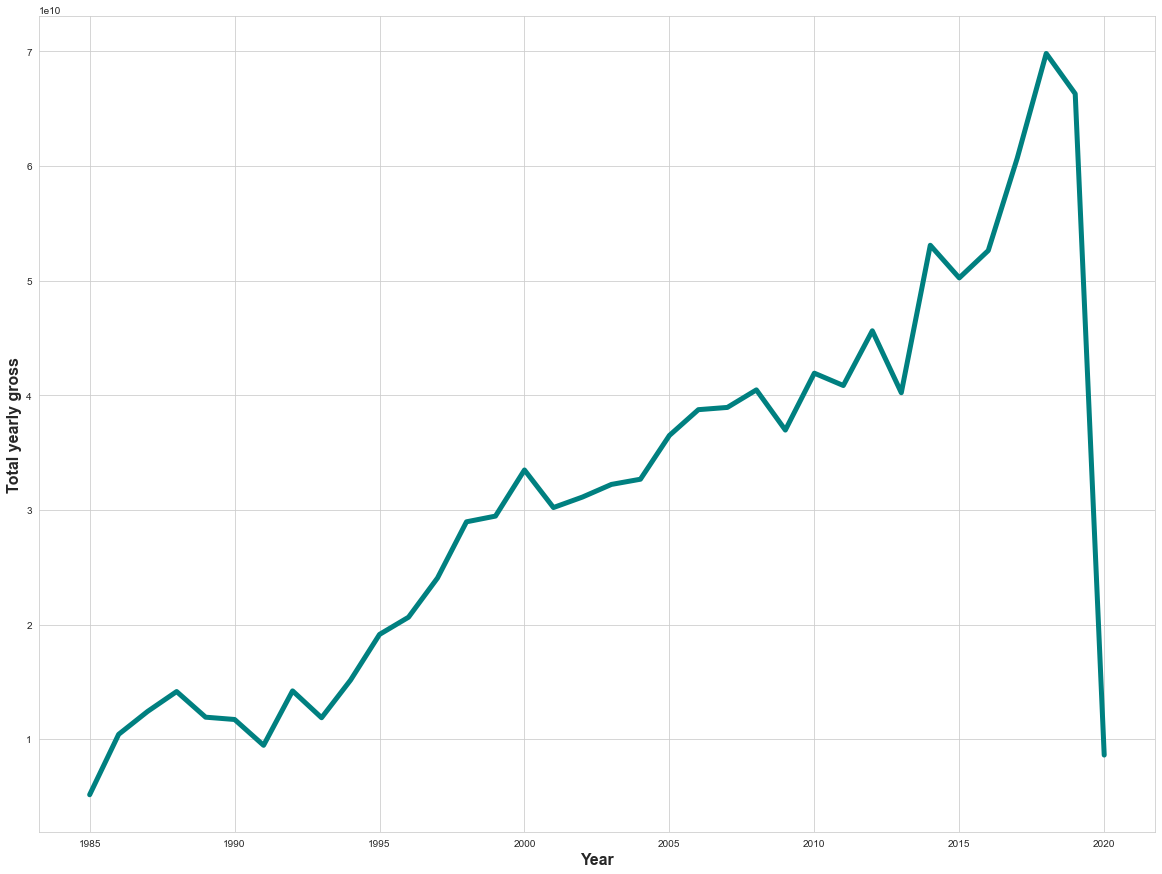

In [11]:
fig, ax = plt.subplots(figsize=(20,15))
df = gross_data[['weekly_gross_overall','year','month','week_number']]
df2 = df.groupby(['year']).sum().reset_index()
sns.lineplot(x=df2['year'],y=df2['weekly_gross_overall'],color="teal",linewidth="5")
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Total yearly gross', fontsize = 16, fontdict=dict(weight='bold'))